In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [7]:
df = pd.read_csv("googleplaystore.csv")

In [8]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.shape


(10841, 13)

In [11]:
df.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
df[df['Reviews'] == '3.0M']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
for i in range(len(df.columns)-1,1,-1):
    df.loc[[df[df['Category']=='1.9'].index[0]],[df.columns[i]]]=df.loc[[df[df['Category']=='1.9'].index[0]],[df.columns[i-1]]].values
df.loc[[df[df['Category']=='1.9'].index[0]],['Category']]='ART_AND_DESIGN'


In [14]:
df.iloc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                   ART_AND_DESIGN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [15]:
df['Reviews']=df['Reviews'].astype(int)


In [16]:
df['Price'].replace(to_replace='0', value='$0', inplace=True)
df['Price'] = df['Price'].apply(lambda a : a[1:])
df['Price'] = df['Price'].astype(float)

In [17]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [18]:
df['Size'].replace(to_replace="Varies with device", value="0M", inplace=True)
df['Size']=df['Size'].apply(lambda a : a.replace(',',''))

In [19]:
df['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839      0M
10840     19M
Name: Size, Length: 10841, dtype: object

In [20]:
df['Value']=df['Size'].apply(lambda a : a[:-1])
df['Unit']=df['Size'].apply(lambda a : a[-1:])
df['Value']=df['Value'].astype(float)

In [21]:
df[['Value', 'Unit']].head()

,Value,Unit
0,19.0,M
1,14.0,M
2,8.7,M
3,25.0,M
4,2.8,M


In [22]:
df['Installs'].replace(to_replace='0',value='0+',inplace=True)
df['Installs']=df['Installs'].apply(lambda a : a.replace(',',''))

df['Installs']=df['Installs'].apply(lambda a : a[:-1])
df['Installs']=df['Installs'].astype(int)

In [23]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

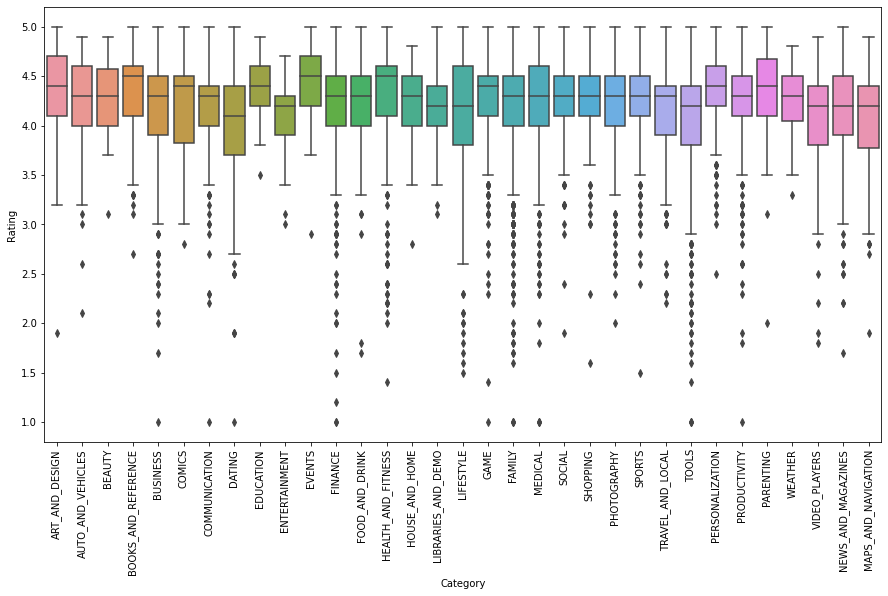

In [24]:
df['Rating'] = df['Rating'].astype(float)
plt.figure(figsize=(15, 8))
sns.boxplot(x="Category", y="Rating", data=df)
plt.xticks(rotation=90)

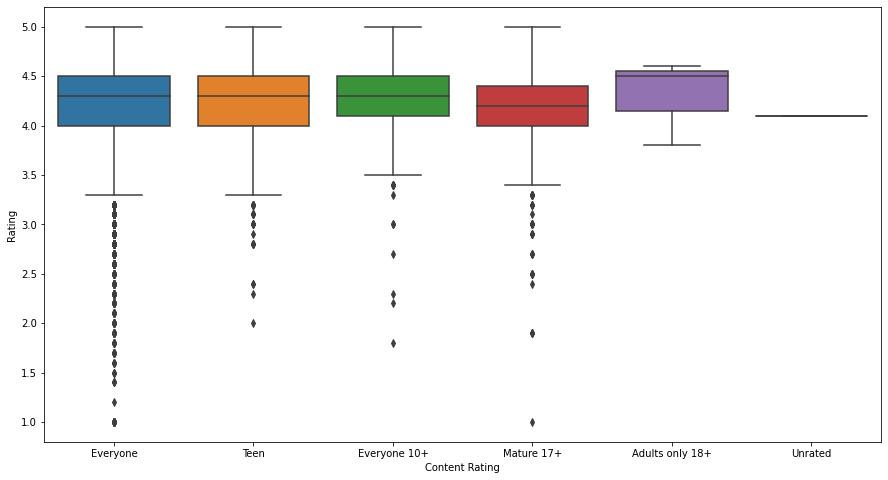

In [25]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Content Rating", y="Rating", data=df)

In [26]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [27]:
df[df['Genres'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,1.9,19,3.0M,1000,Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,3.0,M


In [28]:
df.loc[[df[df['Genres'].isnull()].index[0]],['Genres']]='Art & Design'

In [29]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0M,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0,M


In [30]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [31]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,11.0,M
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN,2.1,M


In [32]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [33]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Value,Unit
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,2.7,M
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,11.0,k
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,8.7,M
6803,BT Master,FAMILY,NaN,0,222k,100,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up,222.0,k
7333,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,14.0,M
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,7.2,M
7730,UFO-CQ,TOOLS,NaN,1,237k,10,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,237.0,k
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,1000,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,658.0,k


In [34]:
temp=pd.DataFrame()
for i in df['Category'].unique():
    temp1=df[(df['Category']==i)]['Rating'].fillna(df[(df['Category']==i)]['Rating'].mode()[0])
    temp=pd.concat([temp,temp1])

In [35]:

df['Rating']=temp

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10841 non-null  object 
 13  Value           10841 non-null  float64
 14  Unit            10841 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.2+ MB


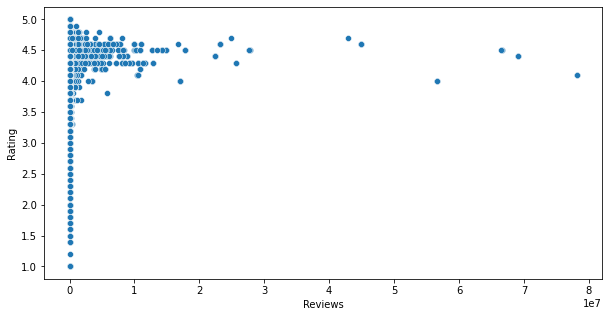

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Reviews',y='Rating',data=df)

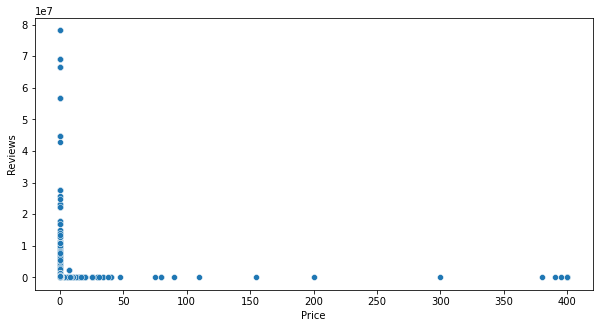

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Price',y='Reviews',data=df)

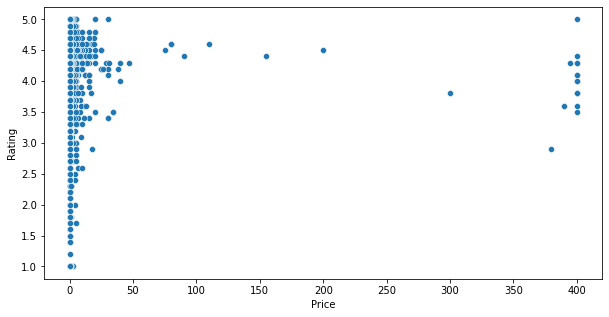

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Price',y='Rating',data=df)

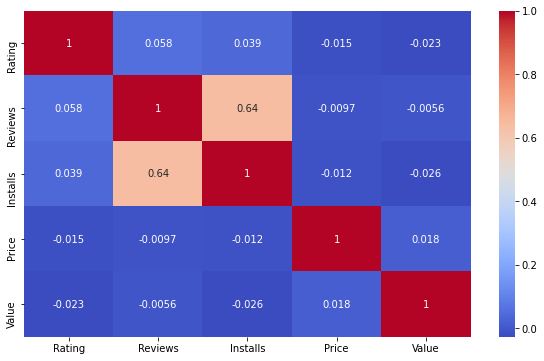

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [41]:
app_size=df[['App','Size','Value','Unit']]

In [42]:
app_size.head()


,App,Size,Value,Unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,19M,19.0,M
1,Coloring book moana,14M,14.0,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7M,8.7,M
3,Sketch - Draw & Paint,25M,25.0,M
4,Pixel Draw - Number Art Coloring Book,2.8M,2.8,M


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


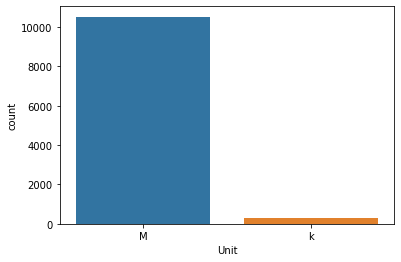

In [43]:
sns.countplot(app_size['Unit'])

In [44]:
app_size[app_size['Unit']=='M'].sort_values('Value',ascending=False)[['App','Size']].head(20)

,App,Size
1793,Mini Golf King - Multiplayer Game,100M
1565,Talking Babsy Baby: Baby Games,100M
8409,Car Crash III Beam DH Real Damage Simulator 2018,100M
9170,Stickman Legends: Shadow Wars,100M
5865,Gangster Town: Vice District,100M
1988,Hungry Shark Evolution,100M
5862,Miami crime simulator,100M
1080,Post Bank,100M
5530,The Walking Dead: Our World,100M
5427,Ultimate Tennis,100M


In [45]:
app_inst=df[['App','Installs']]

In [46]:
app_inst.head()

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000
1,Coloring book moana,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000
3,Sketch - Draw & Paint,50000000
4,Pixel Draw - Number Art Coloring Book,100000


In [47]:
app_inst.sort_values('Installs',ascending=False).head(10)

,App,Installs
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000
2884,Google Photos,1000000000
3665,YouTube,1000000000
2853,Google Photos,1000000000
4234,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000


In [48]:
app_rev=df[['App','Reviews']]

In [49]:
app_rev.sort_values('Reviews',ascending=False).head(10)

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
381,WhatsApp Messenger,69119316
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2611,Instagram,66577313
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578


In [50]:
app_grp=df.groupby('Category')

In [51]:
grp=app_grp.mean()
grp['Count']=app_grp['App'].count()

In [52]:
grp.sort_values(['Reviews','Rating'],ascending=False).head()

,Rating,Reviews,Installs,Price,Value,Count
Category,,,,,,
COMMUNICATION,4.180103,2.107138e+06,8.435989e+07,0.214832,38.200258,387
SOCIAL,4.261017,2.105903e+06,4.769447e+07,0.054136,18.658983,295
GAME,4.295105,1.385859e+06,3.066960e+07,0.251136,40.633042,1144
PHOTOGRAPHY,4.197910,6.373631e+05,3.011417e+07,0.400627,16.111642,335
VIDEO_PLAYERS,4.084000,6.307439e+05,3.555430e+07,0.059771,16.493143,175


In [53]:
grp.sort_values(['Count'],ascending=False).head()

,Rating,Reviews,Installs,Price,Value,Count
Category,,,,,,
FAMILY,4.204564,2.080255e+05,5.201959e+06,1.234675,35.309381,1972
GAME,4.295105,1.385859e+06,3.066960e+07,0.251136,40.633042,1144
TOOLS,4.067141,3.240629e+05,1.358573e+07,0.317023,41.882681,843
MEDICAL,4.265011,3.425432e+03,1.150269e+05,3.110065,41.708855,463
BUSINESS,4.216522,3.033598e+04,2.178076e+06,0.402761,23.150000,460


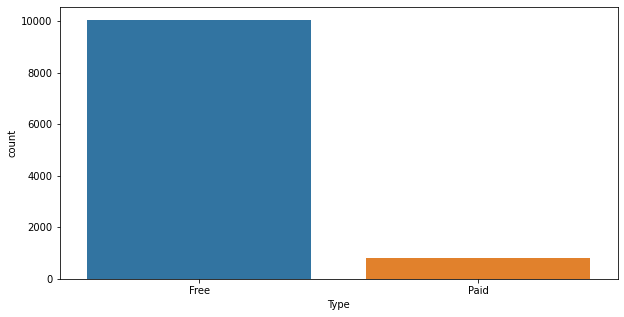

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Type", data=df)

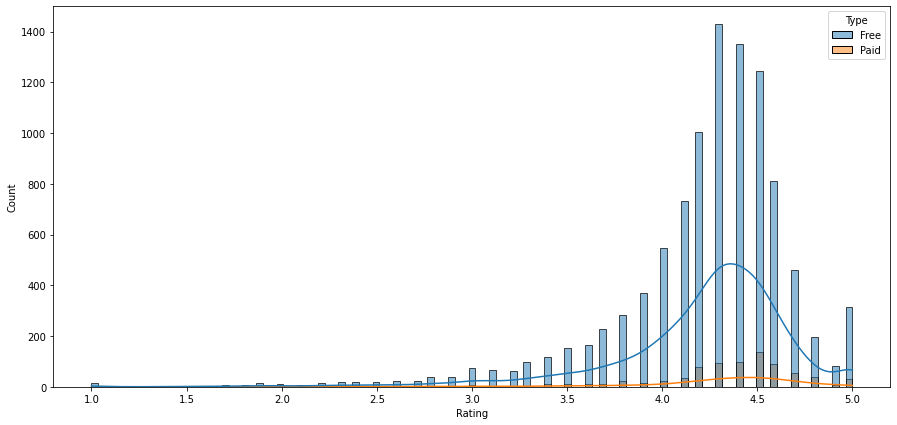

In [55]:
plt.figure(figsize=(15,7))
sns.histplot(x='Rating',hue='Type',data=df,kde=True)

In [56]:
type_grp=df.groupby('Type')
type_grp=type_grp.mean()
type_grp['Count']=df.groupby('Type')['App'].count()
type_grp

,Rating,Reviews,Installs,Price,Value,Count
Type,,,,,,
Free,4.214779,478565.756598,1.668763e+07,0.000000,29.492889,10041
Paid,4.291625,11673.312500,9.119510e+04,13.920837,53.192500,800


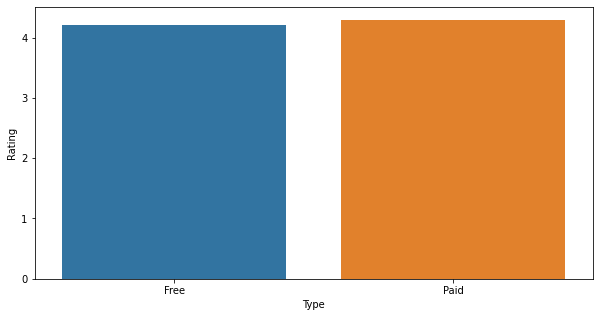

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=type_grp.index,y='Rating',data=type_grp)

In [58]:
app_year=df[['App','Installs','Reviews','Rating','Last Updated']]
app_year

,App,Installs,Reviews,Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,159,4.1,"January 7, 2018"
1,Coloring book moana,500000,967,3.9,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,87510,4.7,"August 1, 2018"
3,Sketch - Draw & Paint,50000000,215644,4.5,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,100000,967,4.3,"June 20, 2018"
...,...,...,...,...,...
10836,Sya9a Maroc - FR,5000,38,4.5,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,100,4,5.0,"July 6, 2018"
10838,Parkinson Exercices FR,1000,3,4.5,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,1000,114,4.5,"January 19, 2015"


In [59]:
app_year['Year']=app_year['Last Updated'].apply(lambda a : a[-4:])
app_year['Year']=app_year['Year'].astype(int)
app_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Installs,Reviews,Rating,Last Updated,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,159,4.1,"January 7, 2018",2018
1,Coloring book moana,500000,967,3.9,"January 15, 2018",2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,87510,4.7,"August 1, 2018",2018
3,Sketch - Draw & Paint,50000000,215644,4.5,"June 8, 2018",2018
4,Pixel Draw - Number Art Coloring Book,100000,967,4.3,"June 20, 2018",2018


In [60]:
year_grp=app_year.sort_values(['Installs','Reviews'],ascending=False).groupby('Year')
year_grp.first().sort_index(ascending=False)

,App,Installs,Reviews,Rating,Last Updated
Year,,,,,
2018,Facebook,1000000000,78158306,4.1,"August 3, 2018"
2017,Geometry Dash Lite,100000000,6181640,4.5,"December 22, 2017"
2016,Vector,100000000,3058687,4.4,"July 18, 2016"
2015,Smash Hit,100000000,4147718,4.5,"November 26, 2015"
2014,Five Nights at Freddy's 2 Demo,50000000,1503544,4.3,"November 15, 2014"
2013,SpongeBob Diner Dash,50000000,576210,4.0,"August 22, 2013"
2012,Aviary Stickers: Free Pack,10000000,126862,3.5,"January 17, 2012"
2011,CONTRACT KILLER: ZOMBIES,5000000,144545,4.4,"December 1, 2011"
2010,FML F*ck my life + widget,100000,1415,4.2,"May 21, 2010"


In [61]:
year_grp=app_year.sort_values(['Reviews','Installs'],ascending=False).groupby('Year')
year_grp.first().sort_index(ascending=False)

,App,Installs,Reviews,Rating,Last Updated
Year,,,,,
2018,Facebook,1000000000,78158306,4.1,"August 3, 2018"
2017,Geometry Dash Lite,100000000,6181640,4.5,"December 22, 2017"
2016,Vector,100000000,3058687,4.4,"July 18, 2016"
2015,Smash Hit,100000000,4147718,4.5,"November 26, 2015"
2014,FRONTLINE COMMANDO: D-DAY,10000000,1736105,4.5,"May 16, 2014"
2013,FRONTLINE COMMANDO,10000000,1351833,4.4,"October 28, 2013"
2012,Aviary Stickers: Free Pack,10000000,126862,3.5,"January 17, 2012"
2011,CONTRACT KILLER: ZOMBIES,5000000,144545,4.4,"December 1, 2011"
2010,FML F*ck my life + widget,100000,1415,4.2,"May 21, 2010"


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
required_data=df[['App', 'Category', 'Reviews', 'Installs','Price', 'Content Rating','Value', 'Unit','Genres']]
target=df['Rating']
target.index=df['App']

In [64]:
required_data['Year']=df['Last Updated'].apply(lambda a : a[-4:])
required_data['Year']=required_data['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
required_data.set_index('App',inplace=True)
required_data.head()

,Category,Reviews,Installs,Price,Content Rating,Value,Unit,Genres,Year
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,10000,0.0,Everyone,19.0,M,Art & Design,2018
Coloring book moana,ART_AND_DESIGN,967,500000,0.0,Everyone,14.0,M,Art & Design;Pretend Play,2018
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,87510,5000000,0.0,Everyone,8.7,M,Art & Design,2018
Sketch - Draw & Paint,ART_AND_DESIGN,215644,50000000,0.0,Teen,25.0,M,Art & Design,2018
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,100000,0.0,Everyone,2.8,M,Art & Design;Creativity,2018


In [66]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Reviews         10841 non-null  int64  
 2   Installs        10841 non-null  int64  
 3   Price           10841 non-null  float64
 4   Content Rating  10841 non-null  object 
 5   Value           10841 non-null  float64
 6   Unit            10841 non-null  object 
 7   Genres          10841 non-null  object 
 8   Year            10841 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 847.0+ KB


In [67]:
required_data=pd.get_dummies(required_data,columns=['Unit'],drop_first=True)

In [68]:
LE=LabelEncoder()
LE.fit(required_data['Content Rating'])
required_data['Content Rating']=LE.transform(required_data['Content Rating'])

In [69]:
LE.fit(required_data['Category'])
required_data['Category']=LE.transform(required_data['Category'])

In [70]:
LE.fit(required_data['Genres'])
required_data['Genres']=LE.transform(required_data['Genres'])

In [71]:
required_data.head()

,Category,Reviews,Installs,Price,Content Rating,Value,Genres,Year,Unit_k
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0,159,10000,0.0,1,19.0,9,2018,0
Coloring book moana,0,967,500000,0.0,1,14.0,12,2018,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0,87510,5000000,0.0,1,8.7,9,2018,0
Sketch - Draw & Paint,0,215644,50000000,0.0,4,25.0,9,2018,0
Pixel Draw - Number Art Coloring Book,0,967,100000,0.0,1,2.8,11,2018,0


In [72]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  int64  
 1   Reviews         10841 non-null  int64  
 2   Installs        10841 non-null  int64  
 3   Price           10841 non-null  float64
 4   Content Rating  10841 non-null  int64  
 5   Value           10841 non-null  float64
 6   Genres          10841 non-null  int64  
 7   Year            10841 non-null  int64  
 8   Unit_k          10841 non-null  uint8  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 772.8+ KB


In [73]:
required_data.shape

(10841, 9)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [76]:
sc=StandardScaler()
sc.fit(required_data)
required_data_sc=sc.transform(required_data)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(required_data_sc, target, test_size=0.3)

In [78]:
prediction=pd.DataFrame(y_test)
prediction.head()

,Rating
App,
Go,4.6
DC Metro Transit - Free,4.4
Cinematic Cinematic,4.4
"Shopkick: Free Gift Cards, Shop Rewards & Deals",4.3
WiFi FPV,3.8


In [79]:
prediction=pd.DataFrame(y_test)
prediction.head()

,Rating
App,
Go,4.6
DC Metro Transit - Free,4.4
Cinematic Cinematic,4.4
"Shopkick: Free Gift Cards, Shop Rewards & Deals",4.3
WiFi FPV,3.8


In [82]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
prediction['Linear_R']=LR.predict(X_test)
prediction['Linear_R']=round(prediction['Linear_R'],1)

In [84]:
print(np.sqrt(mean_squared_error(prediction['Rating'],prediction['Linear_R'])))

0.4615994859827898


In [85]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
prediction['Lasso']=lasso.predict(X_test)
prediction['Lasso']=round(prediction['Lasso'],1)

In [87]:
print(np.sqrt(mean_squared_error(prediction['Rating'],prediction['Lasso'])))

0.46585535436406766


In [88]:
prediction.head(10)

,Rating,Linear_R,Lasso
App,,,
Go,4.6,4.2,4.2
DC Metro Transit - Free,4.4,4.2,4.2
Cinematic Cinematic,4.4,4.2,4.2
"Shopkick: Free Gift Cards, Shop Rewards & Deals",4.3,4.2,4.2
WiFi FPV,3.8,4.2,4.2
DG Mobile,4.3,4.2,4.2
Learn English with Aco,4.6,4.2,4.2
Walk with Map My Walk,4.5,4.2,4.2
Papumba Academy - Fun Learning For Kids,4.4,4.3,4.2


In [89]:
app_recom=df[(df['Installs']>1000) & (df['Reviews']>100)][['Category', 'Reviews','Rating', 'Installs','Price', 'Content Rating','Genres']]

In [90]:
app_recom=pd.get_dummies(app_recom,columns=['Category','Content Rating','Genres'],prefix='',prefix_sep='')

In [91]:
sc=StandardScaler()
sc.fit(app_recom)
app_recom=pd.DataFrame(sc.transform(app_recom))

In [92]:
app_recom.index=df[(df['Installs']>1000) & (df['Reviews']>100)]['App']

In [93]:
app_recom=app_recom.T
app_recom.head()

App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book,Paper flowers instructions,Smoke Effect Photo Maker - Smoke Editor,Infinite Painter,Garden Coloring Book,Kids Paint Free - Drawing Fun,Text on Photo - Fonteee,Name Art Photo Editor - Focus n Filters,Tattoo Name On My Photo Editor,Mandala Coloring Book,3D Color Pixel by Number - Sandbox Art Coloring,Photo Designer - Write your name with shapes,FlipaClip - Cartoon animation,ibis Paint X,Logo Maker - Small Business,Boys Photo Editor - Six Pack & Men's Suit,Superheroes Wallpapers | 4K Backgrounds,HD Mickey Minnie Wallpapers,Harley Quinn wallpapers HD,Colorfit - Drawing & Coloring,Animated Photo Editor,Pencil Sketch Drawing,Easy Realistic Drawing Tutorial,Pink Silver Bow Keyboard Theme,Art Drawing Ideas,Anime Manga Coloring Book,Easy Origami Ideas,I Creative Idea,How to draw Ladybug and Cat Noir,UNICORN - Color By Number & Pixel Art Coloring,Floor Plan Creator,PIP Camera - PIP Collage Maker,How To Color Disney Princess - Coloring Pages,Drawing Clothes Fashion Ideas,Sad Poetry Photo Frames 2018,Textgram - write on photos,...,Fisher-Price® Smart Connect™,Fingerprint Lock Screen Prank,FP Разбитый дисплей,Chat For Strangers - Video Chat,FreedomPop Diagnostics,Modern Counter Terrorist FPS Shoot,BEBONCOOL GAMEPAD V1.0,Union League,Fortune Quest: Savior,Modern Strike Online,Trine 2: Complete Story,Modern Counter Terror Attack – Shooting Game,Big Hunter,"sugar, sugar",ChopAssistant,Modern Counter Global Strike 3D,Modern Counter Global Strike 3D V2,HipChat - beta version,Winter Wonderland,Soccer Clubs Logo Quiz,Sid Story,Reindeer VPN - Proxy VPN,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,Fuel Rewards® program,Fr Daoud Lamei,FR Roster,FR: My Famous Lover,Fatal Raid - No.1 Mobile FPS,Poker Pro.Fr,Castle Clash: RPG War and Strategy FR,FR: My Secret Pets!,Golden Dictionary (FR-AR),HTC Sense Input - FR,Frim: get new friends on local chat rooms,Fr Agnel Ambarnath,Manga-FR - Anime Vostfr,Bulgarian French Dictionary Fr,News Minecraft.fr,FR Tides,iHoroscope - 2018 Daily Horoscope & Astrology
0,-0.184793,-0.184564,-0.160037,-0.123723,-0.184564,-0.184791,-0.184787,-0.174404,-0.180929,-0.184804,-0.180904,-0.182347,-0.172133,-0.183612,-0.184408,-0.183809,-0.129796,-0.121242,-0.184710,-0.184653,-0.182656,-0.184804,-0.184783,-0.179096,-0.184780,-0.184799,-0.184775,-0.184520,-0.184774,-0.183411,-0.184550,-0.184738,-0.184678,-0.182530,-0.174454,-0.184793,-0.184670,-0.184805,-0.184788,-0.101170,...,-0.184718,-0.181781,-0.184577,-0.184662,-0.184710,-0.184613,-0.184723,-0.184572,-0.184800,0.051557,-0.184766,-0.184741,-0.115274,-0.184440,-0.184709,-0.184754,-0.184734,-0.184545,-0.184473,-0.178699,-0.176758,-0.182758,-0.167424,-0.175646,-0.184261,-0.184789,-0.184785,-0.168826,-0.183296,-0.078214,-0.184615,-0.183201,-0.184587,-0.159760,-0.184805,-0.184755,-0.184667,-0.184588,-0.184499,-0.071955
1,-0.287279,-0.780692,1.192962,0.699548,0.206135,0.452842,-1.027399,-0.287279,0.452842,1.192962,0.452842,0.452842,-0.040572,0.946255,0.452842,1.192962,0.206135,0.946255,-0.533985,-0.287279,1.192962,1.192962,1.439669,1.192962,-0.287279,-0.780692,-0.287279,-0.040572,-0.287279,0.699548,-0.040572,1.192962,-1.027399,1.192962,-0.287279,1.192962,-0.533985,-0.040572,0.699548,0.452842,...,-3.741173,-0.287279,0.699548,-2.014226,-3.247760,-0.533985,-0.780692,-0.533985,-1.520813,0.206135,-1.027399,-0.040572,0.206135,-0.040572,-0.040572,-0.287279,-0.533985,-0.287279,-0.533985,-0.040572,0.452842,-0.040572,1.192962,0.946255,1.192962,-0.287279,-0.533985,0.206135,-0.040572,1.192962,-0.533985,-0.040572,-0.533985,-0.533985,-0.040572,-2.014226,0.946255,-1.027399,-1.027399,0.699548
2,-0.222001,-0.217208,-0.173191,0.266984,-0.221121,-0.221610,-0.221610,-0.212317,-0.212317,-0.222001,-0.212317,-0.212317,-0.124282,-0.221121,-0.221121,-0.217208,-0.173191,-0.124282,-0.221121,-0.221121,-0.217208,-0.221610,-0.22200

In [94]:
app_recom.shape

(157, 7382)

In [95]:
for_app=app_recom['Do Not Crash']

In [96]:
recommend=pd.DataFrame(app_recom.corrwith(for_app),columns=['Correlation'])
recommend.sort_values('Correlation',ascending=False).head(10)

,Correlation
App,
Do Not Crash,1.000000
Egg: clicker,1.000000
Plastic Surgery Surgeon Simulator Er Doctor Games,0.999998
My Ex Girlfriend Comes Back,0.999998
SegPlay Mobile Paint by Number,0.999997
Hidden Object Florida Vacation Adventure Fun Game,0.999997
OMG Gross Zit - Date Nightmare,0.999931
King Burger Dash,0.999475
BJ-UFO,0.999475
